In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [18]:
site = "G"

In [17]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951480 entries, 0 to 2951479
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ts                             object 
 1   instanceID                     object 
 2   AoARel                         float64
 3   bladePitch                     float64
 4   bladePitchMax                  float64
 5   bladePitchMin                  float64
 6   bladePitchSetPoint             float64
 7   bladePitchStd                  float64
 8   cP                             float64
 9   generatorTorque                float64
 10  rotorTorque                    float64
 11  TI                             float64
 12  TSR                            float64
 13  Wind_speed                     float64
 14  Wind_direction                 float64
 15  Nacelle_position               float64
 16  Power                          float64
 17  Nacelle_temperature            float64
 18  Am

In [20]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951480 entries, 0 to 2951479
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ts          object
 1   instanceID  object
 2   value       int64 
dtypes: int64(1), object(2)
memory usage: 67.6+ MB


In [23]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

56
['G_WTGA01' 'G_WTGA02' 'G_WTGA03' 'G_WTGA04' 'G_WTGA05' 'G_WTGA06'
 'G_WTGA07' 'G_WTGA08' 'G_WTGA09' 'G_WTGA10' 'G_WTGA11' 'G_WTGA12'
 'G_WTGA13' 'G_WTGA14' 'G_WTGA15' 'G_WTGA16' 'G_WTGA17' 'G_WTGA18'
 'G_WTGA19' 'G_WTGA20' 'G_WTGA21' 'G_WTGA22' 'G_WTGA23' 'G_WTGA24'
 'G_WTGA25' 'G_WTGA26' 'G_WTGA27' 'G_WTGA28' 'G_WTGB01' 'G_WTGB02'
 'G_WTGB03' 'G_WTGB04' 'G_WTGB05' 'G_WTGB06' 'G_WTGB07' 'G_WTGB08'
 'G_WTGB09' 'G_WTGB10' 'G_WTGB11' 'G_WTGB12' 'G_WTGB13' 'G_WTGB14'
 'G_WTGB15' 'G_WTGB16' 'G_WTGB17' 'G_WTGB18' 'G_WTGB19' 'G_WTGB20'
 'G_WTGB21' 'G_WTGB22' 'G_WTGB23' 'G_WTGB24' 'G_WTGB25' 'G_WTGB26'
 'G_WTGB27' 'G_WTGB28']


**Comment:** data size: 2951480 x 26; flag size: 2951480 x 3. There are 56 turbines. 366 x 56 x 24 x 6 + 56 = 2951480. No missing rows.

In [24]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [25]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [26]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [27]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [28]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
2162953,2020-09-25 05:20:00,9,25,5,G_WTGA10,5.3,1.70,32.075471,7.0,58.000000,0
37602,2020-01-05 15:50:00,1,5,15,G_WTGA27,6.4,1.95,30.468750,9.0,109.800003,1
1235370,2020-06-02 04:40:00,6,2,4,G_WTGA11,1.6,0.00,0.000000,27.0,0.000000,0
834328,2020-04-13 11:00:00,4,13,11,G_WTGB13,13.4,1.55,11.567164,5.0,541.000000,1
1713078,2020-07-31 10:20:00,7,31,10,G_WTGB11,5.5,1.26,22.909091,21.0,39.799999,1


### Plot time series

In [29]:
data_01 = data[data['instanceID'] == site + '_WTGA01']

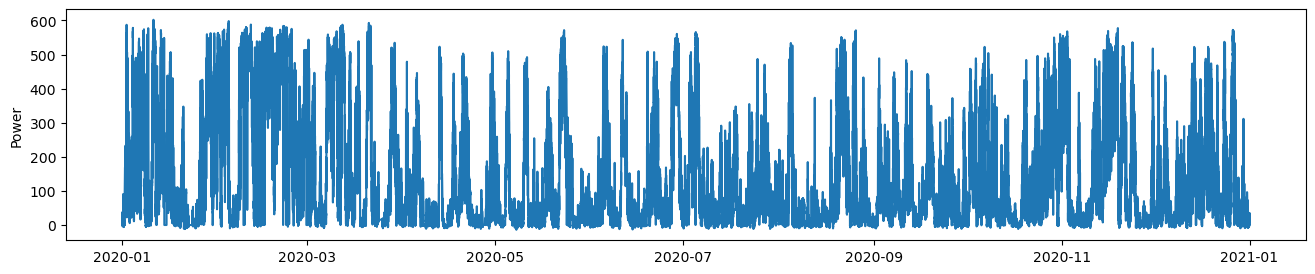

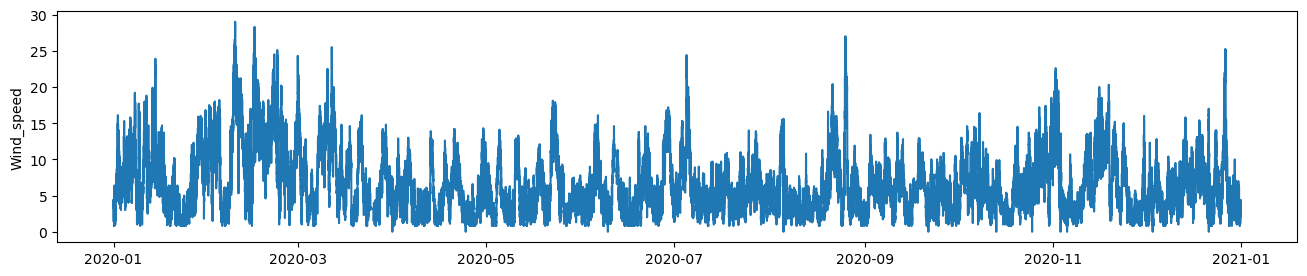

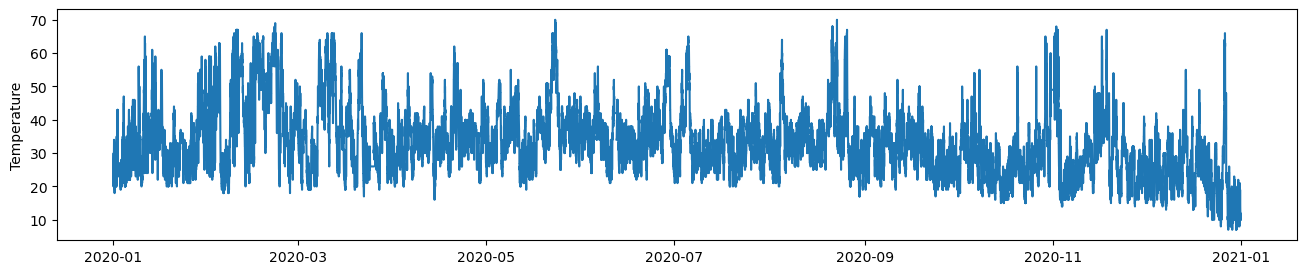

In [30]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Temperature')
plt.show()

### Full performance data

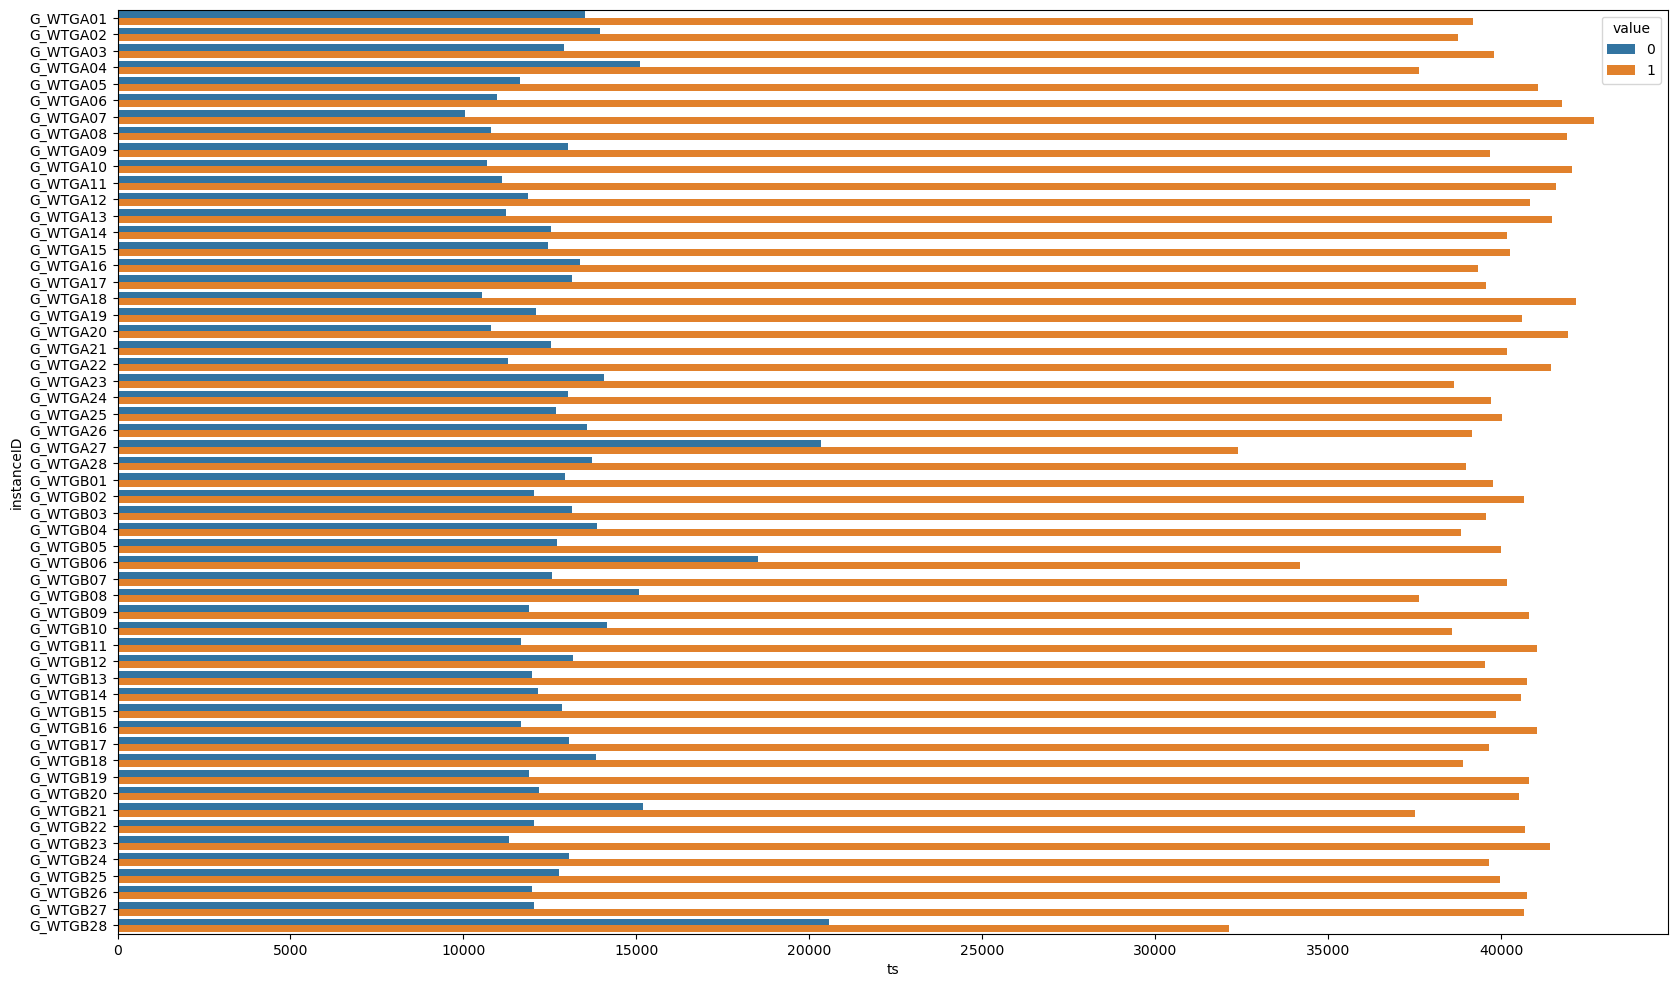

In [31]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (20,12))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")

plt.show()

In [32]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [33]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,2.228276e+06,2.228276e+06,2.228276e+06,2.228276e+06,2.227940e+06,2.227940e+06,2.228151e+06,2.228276e+06
mean,6.510693e+00,1.570336e+01,1.160246e+01,8.036866e+00,1.524437e+00,1.968357e+01,1.323884e+01,1.970773e+02
std,3.500488e+00,8.779962e+00,6.931835e+00,3.999727e+00,7.154348e-01,4.775354e+00,9.029286e+00,1.838630e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,0.000000e+00,-2.000000e+01,6.000000e-01
25%,3.000000e+00,8.000000e+00,6.000000e+00,4.900000e+00,1.000000e+00,1.653465e+01,8.000000e+00,3.850000e+01
50%,7.000000e+00,1.600000e+01,1.200000e+01,7.100000e+00,1.380000e+00,1.927835e+01,1.200000e+01,1.299000e+02
75%,1.000000e+01,2.300000e+01,1.800000e+01,1.030000e+01,1.950000e+00,2.235294e+01,1.600000e+01,3.347000e+02
max,1.200000e+01,3.100000e+01,2.300000e+01,2.640000e+01,1.381000e+01,1.572727e+02,1.430000e+02,6.681000e+02


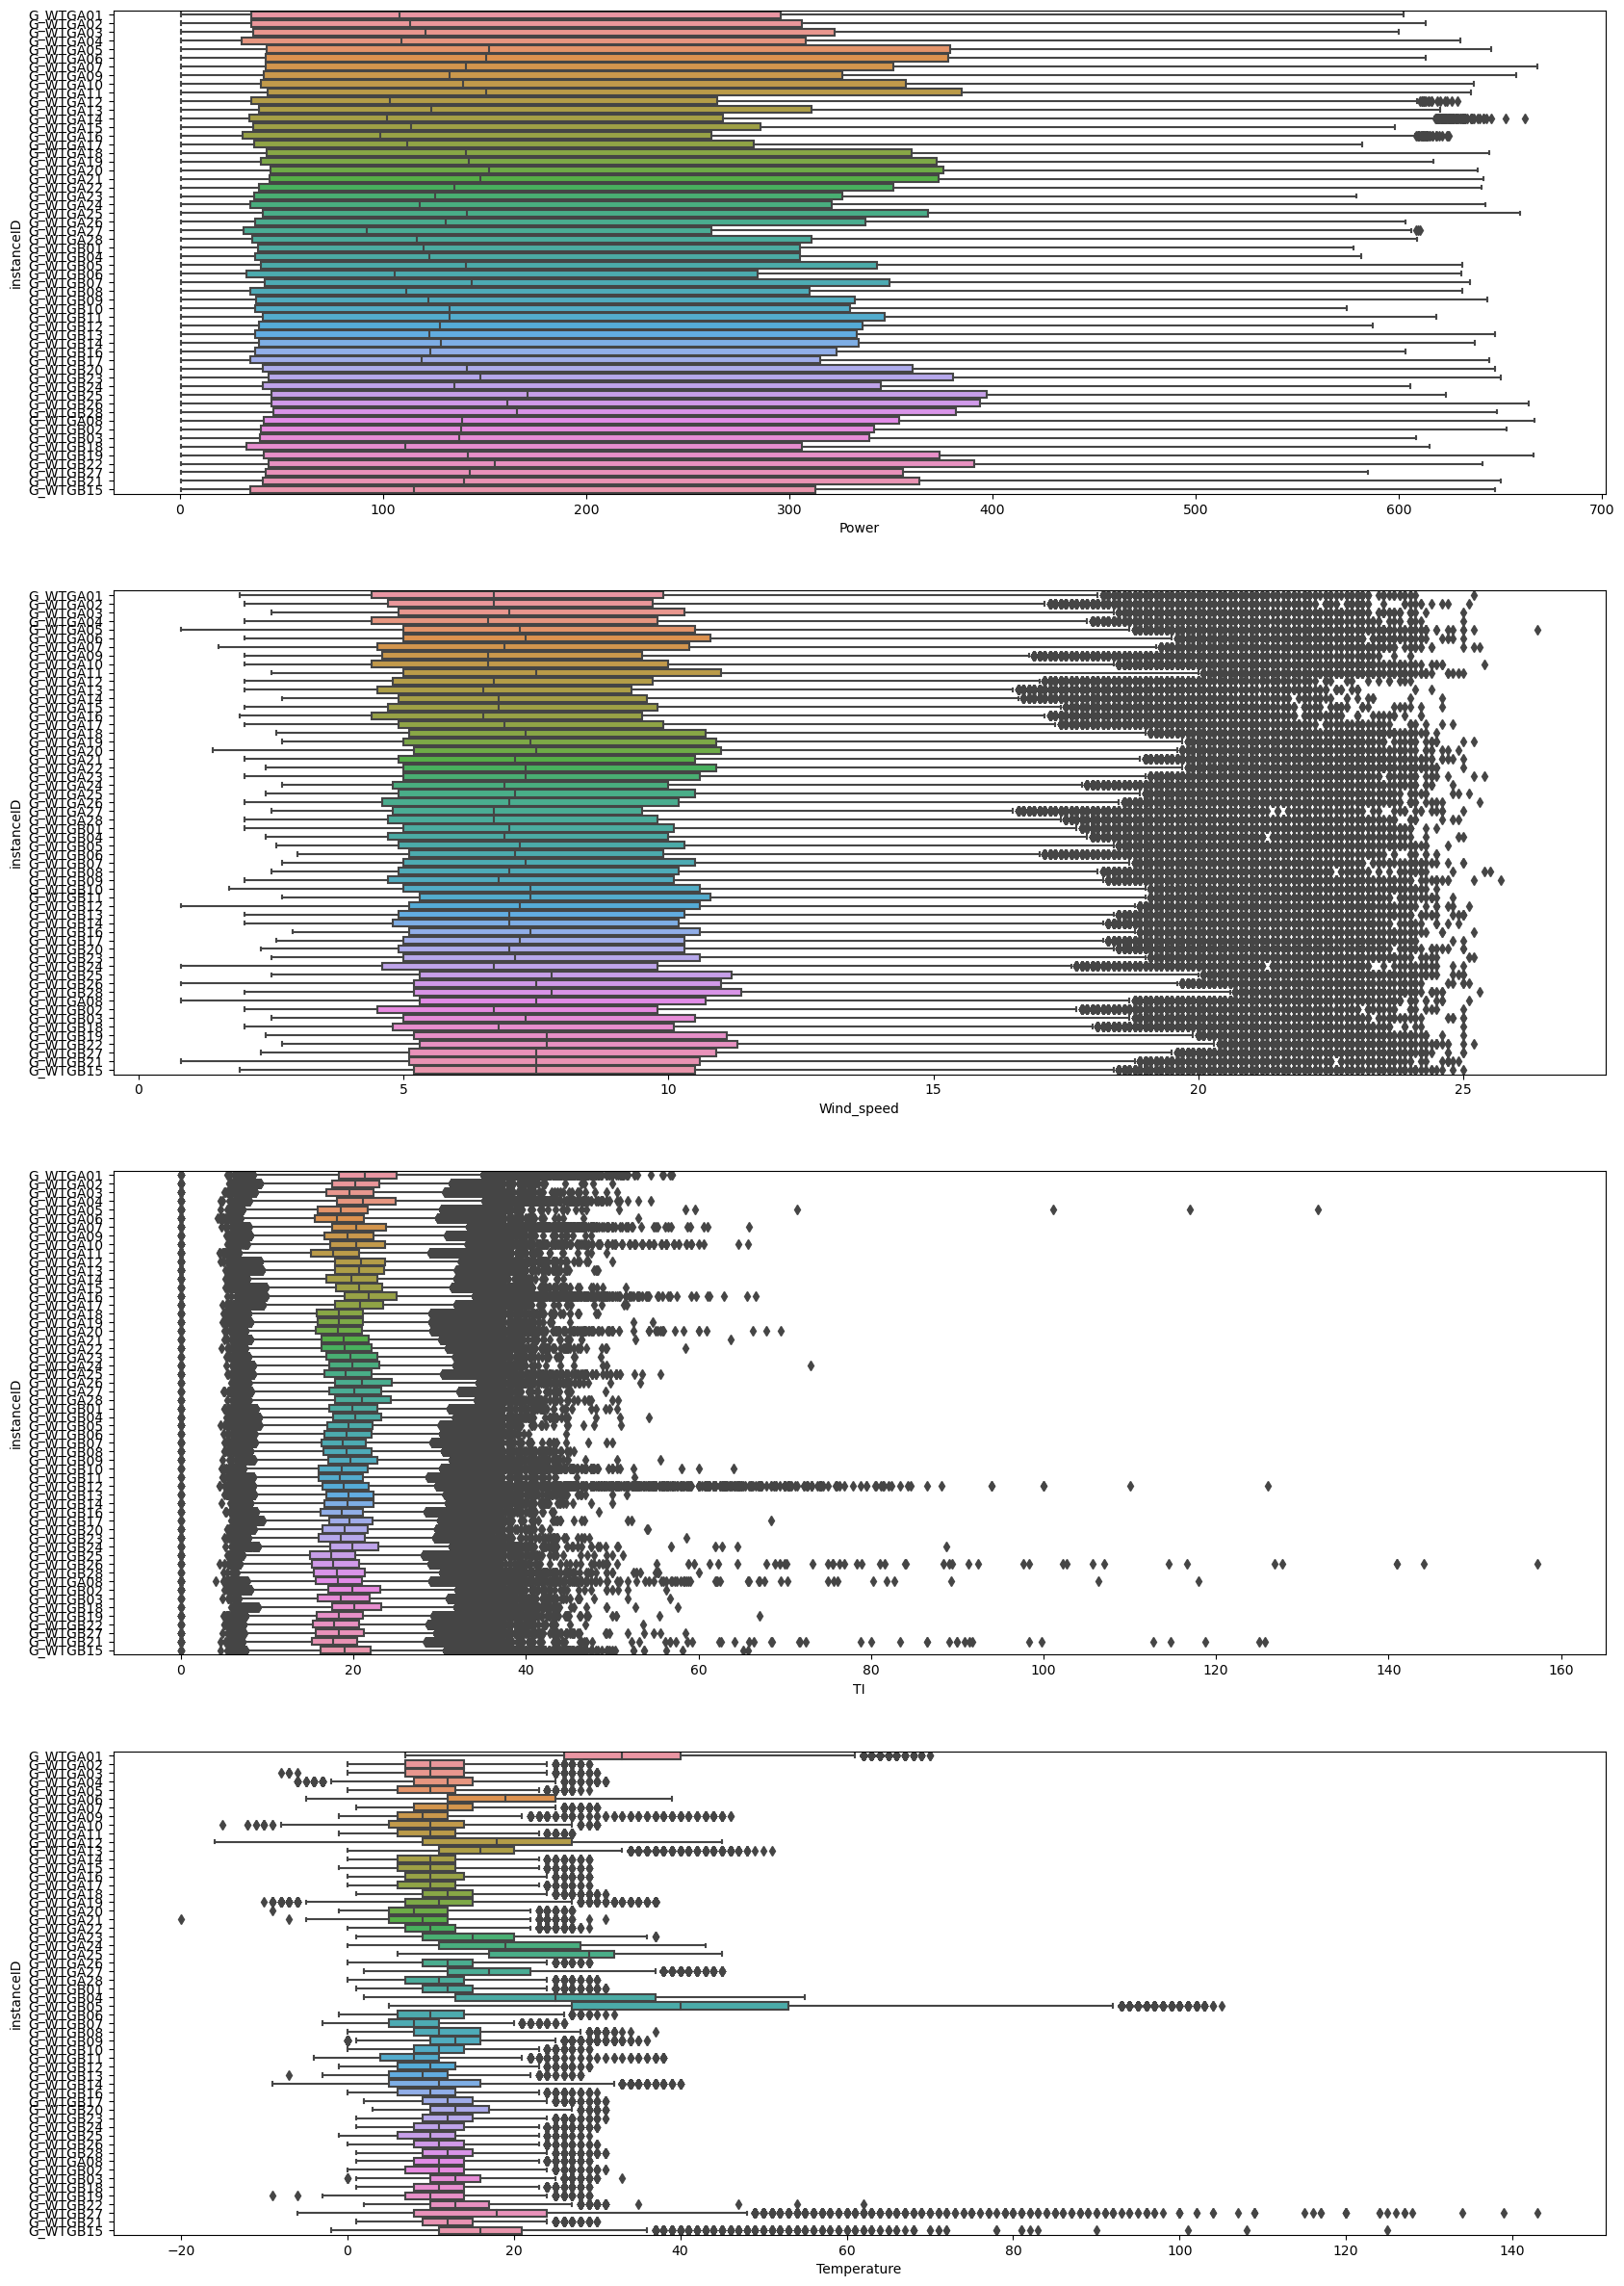

In [35]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (20,30))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

In [38]:
extreme_temperature = data_clean[(data_clean['Temperature'] > 40) | (data_clean['Temperature'] <-5)]
extreme_temperature

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
10112,2020-01-02 06:00:00,1,2,6,G_WTGB05,9.6,1.48,15.416666,42.0,304.000000
10168,2020-01-02 06:10:00,1,2,6,G_WTGB05,9.4,1.95,20.744682,43.0,280.500000
10224,2020-01-02 06:20:00,1,2,6,G_WTGB05,8.7,1.90,21.839081,41.0,264.700012
10280,2020-01-02 06:30:00,1,2,6,G_WTGB05,11.2,2.17,19.375001,43.0,416.299988
10336,2020-01-02 06:40:00,1,2,6,G_WTGB05,10.1,2.02,19.999999,44.0,329.299988
...,...,...,...,...,...,...,...,...,...,...
2916344,2020-12-27 15:30:00,12,27,15,G_WTGB05,8.9,1.82,20.449440,45.0,241.800003
2916399,2020-12-27 15:40:00,12,27,15,G_WTGB04,8.6,2.19,25.465116,41.0,201.300003
2916400,2020-12-27 15:40:00,12,27,15,G_WTGB05,9.1,2.59,28.461536,45.0,240.399994
2916456,2020-12-27 15:50:00,12,27,15,G_WTGB05,7.4,1.26,17.027027,44.0,148.000000


In [39]:
extreme_temperature['instanceID'].value_counts()

G_WTGB05    19346
G_WTGA01     9412
G_WTGB04     6860
G_WTGB27     1451
G_WTGB15      572
G_WTGA13      287
G_WTGA12      205
G_WTGA27      204
G_WTGA25      136
G_WTGA19      112
G_WTGA09       55
G_WTGA24       38
G_WTGA10       25
G_WTGB14       20
G_WTGA04       17
G_WTGA03        6
G_WTGB22        3
G_WTGB19        2
G_WTGA21        2
G_WTGB13        1
G_WTGA20        1
Name: instanceID, dtype: int64

In [40]:
# drop rows with extreme values
data_clean = data_clean[(data_clean['Temperature'] <= 40)]
data_clean = data_clean[(data_clean['Temperature'] >= -5)]
data_clean = data_clean[(data_clean['TI'] <= 100)]

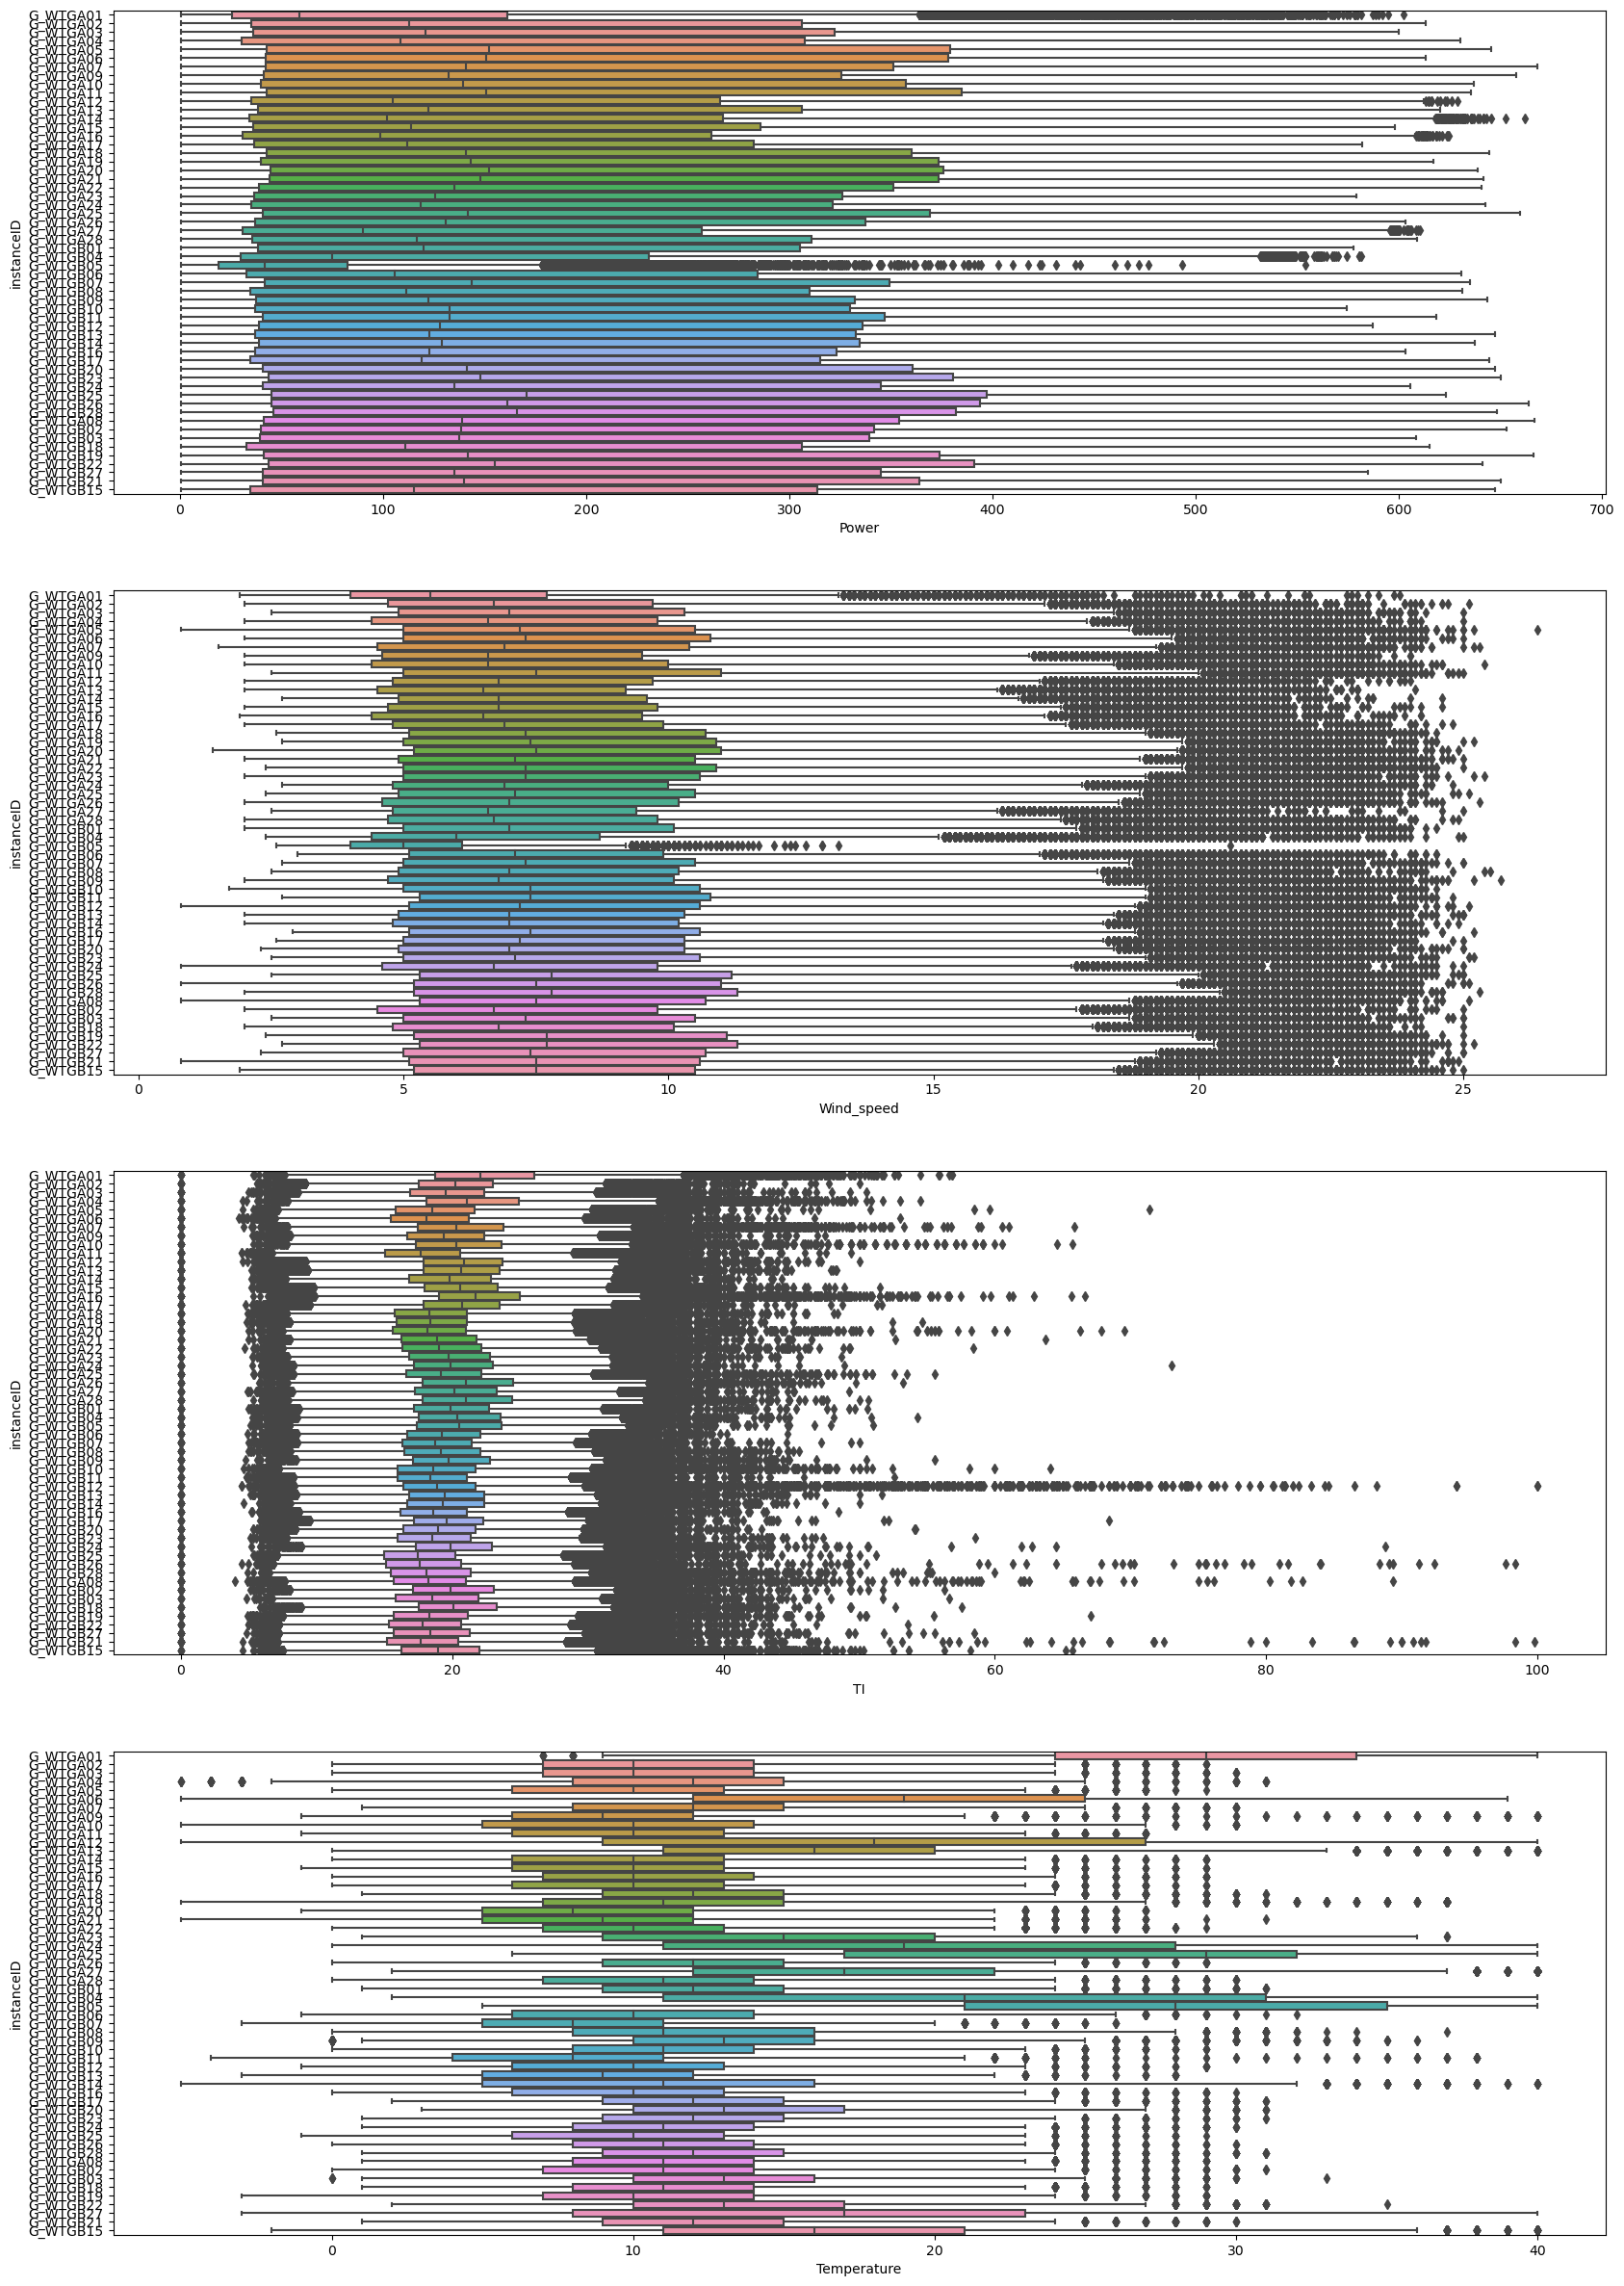

In [41]:
# Make boxplot after removing extreme values
fig, ax = plt.subplots(4, figsize = (20,30))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

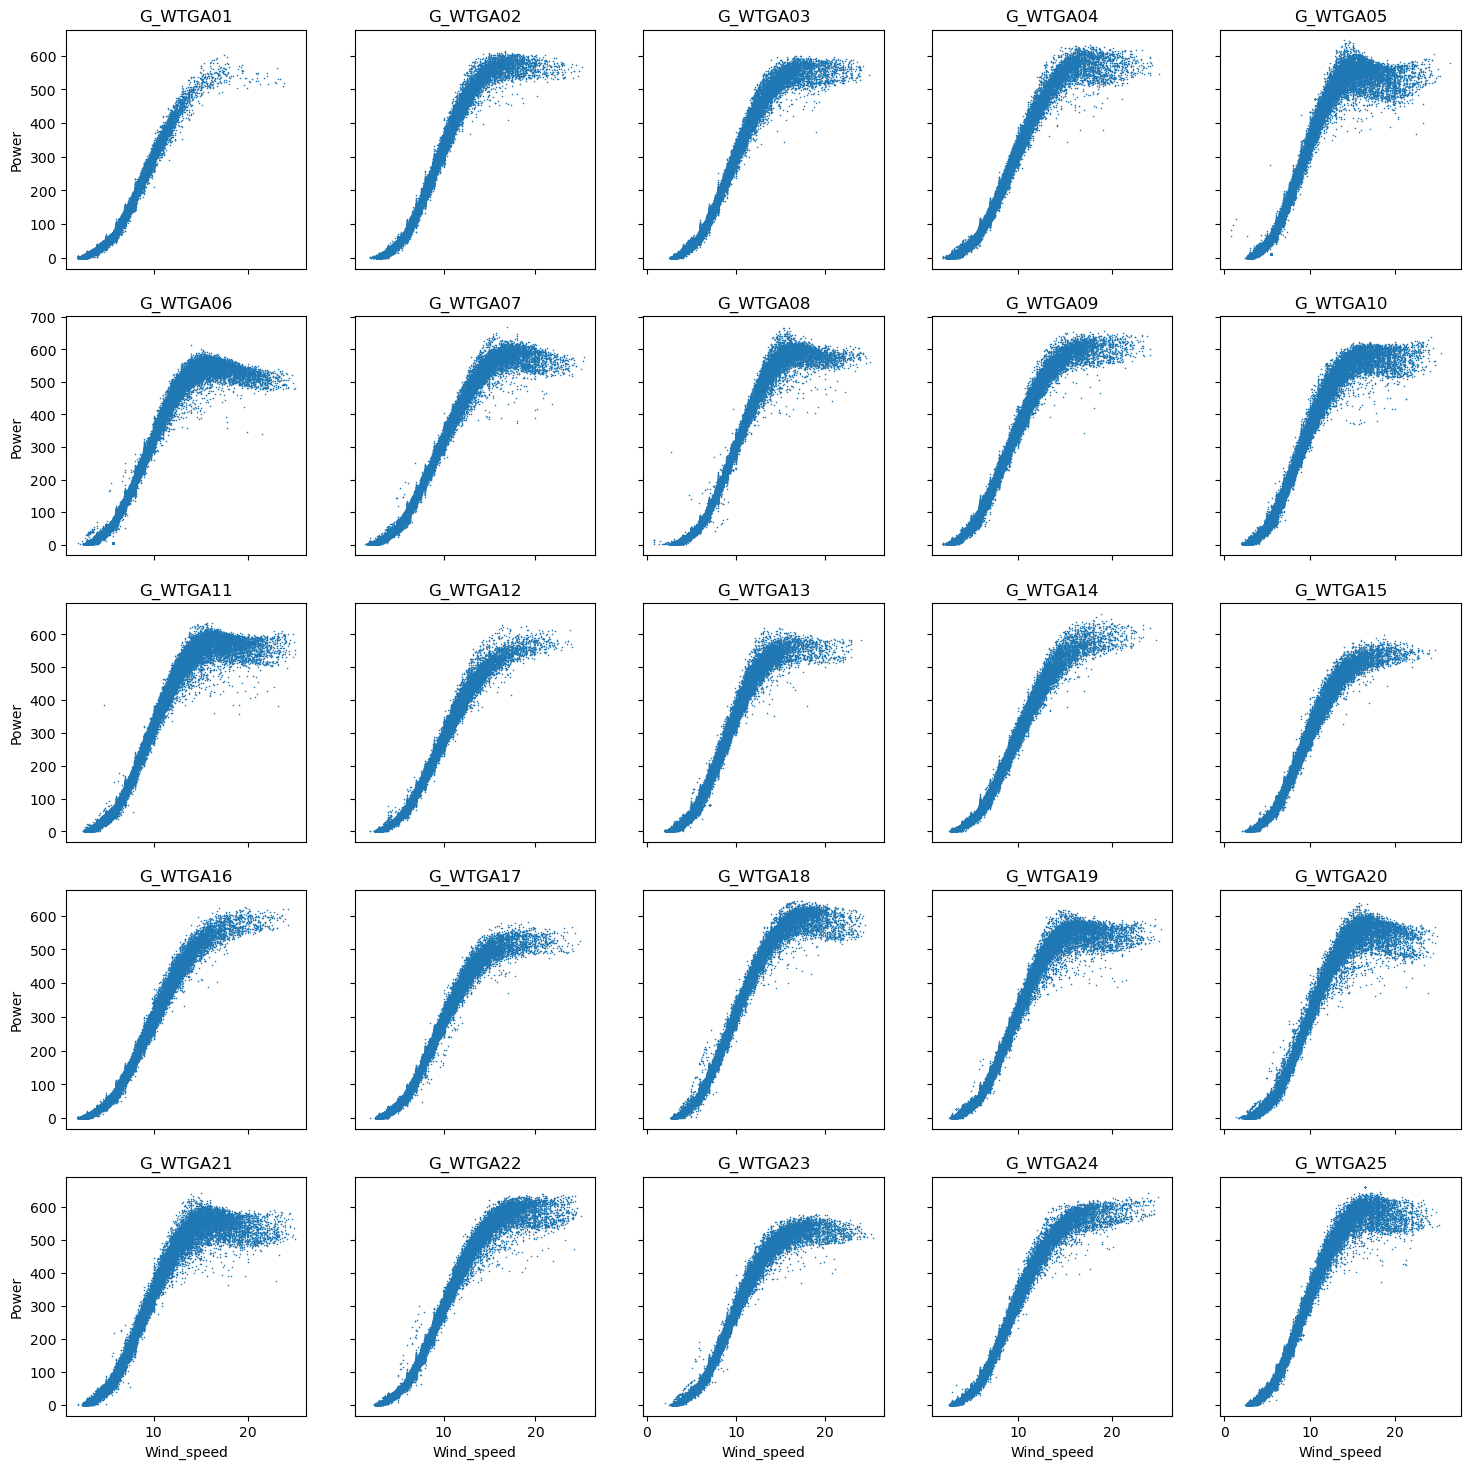

In [42]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (5):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

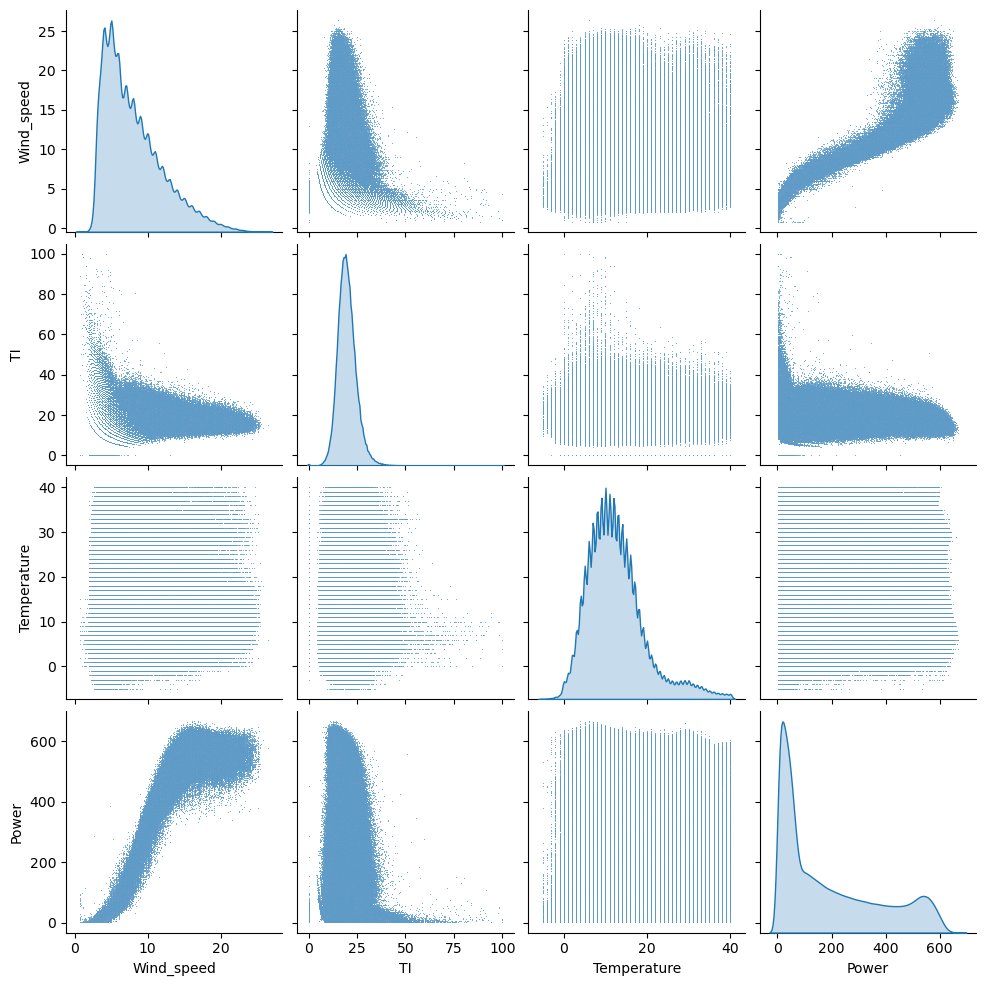

In [43]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

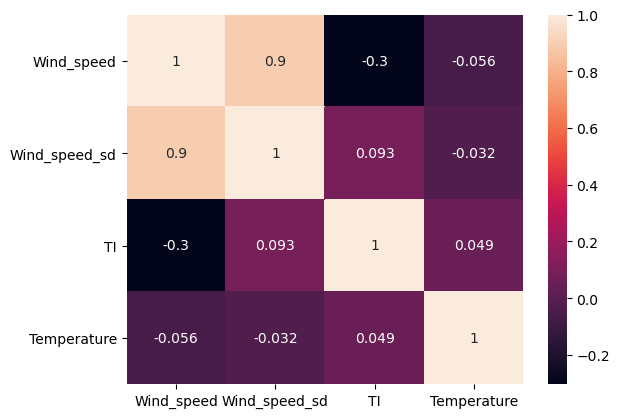

In [44]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

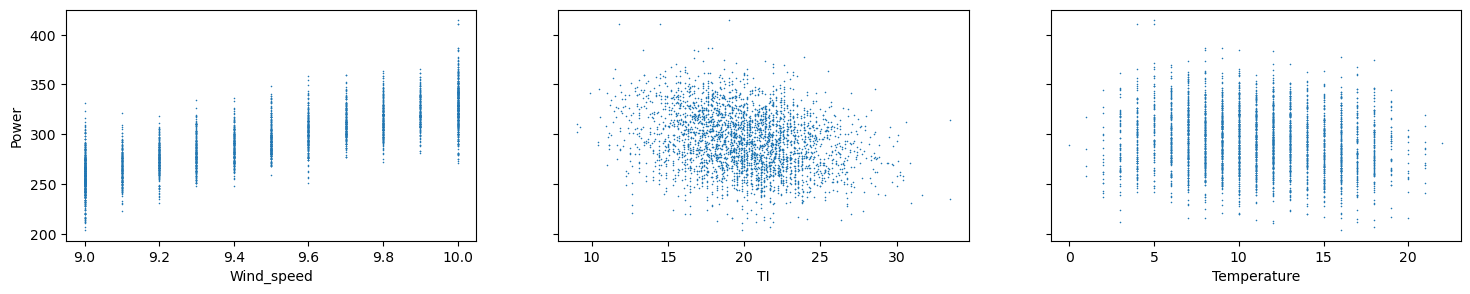

In [47]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTGA02") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

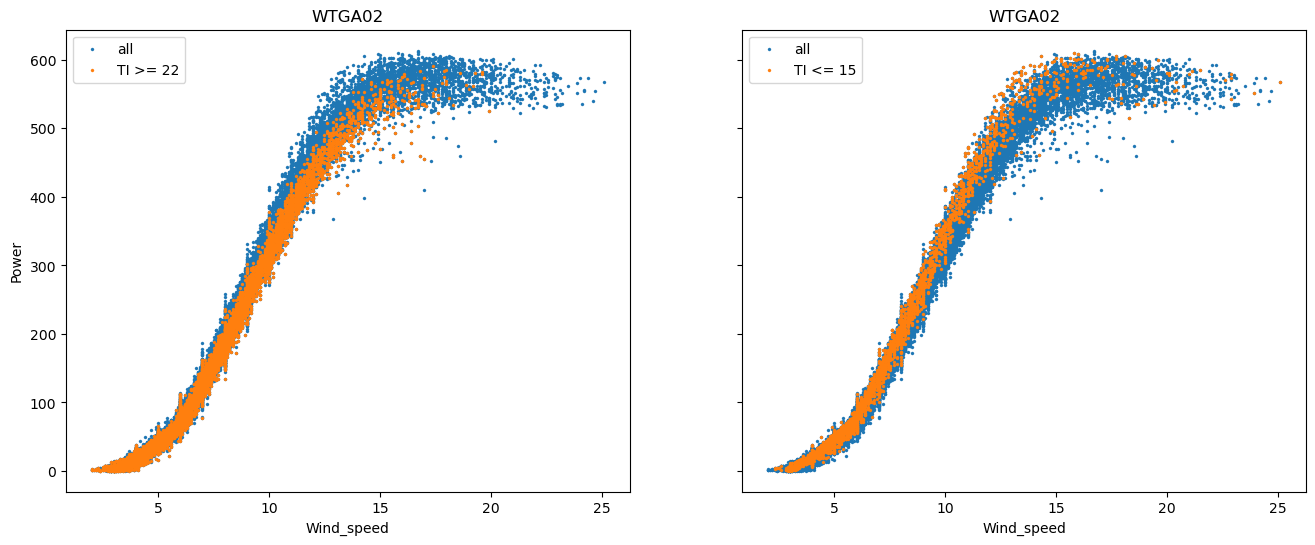

In [48]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTGA02')]
WTG01_a = WTG01[(WTG01['TI'] >= 22)] 
WTG01_b = WTG01[(WTG01['TI'] <= 15)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI >= 22', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTGA02") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 15', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTGA02") 

plt.show()

### Export clean data

In [49]:
# data_clean.to_csv("C://Users//User//Desktop//Wind turbine performance monitoring//Data_clean//" + site + "_data_clean.csv")